In [37]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import libreries
import warnings
warnings.simplefilter('ignore')

In [38]:
expert_type = 'driver'

In [39]:
#results = pd.read_csv('results_tx/results_all_detail_metrics_' + expert_type + '.csv').drop('Unnamed: 0', axis = 1)
detail = pd.read_csv('results_tx/results_detail_all_' + expert_type + '.csv').drop('Unnamed: 0', axis = 1)

In [40]:
detail

,question_id,lambda_exp-nash,optimal_grade-nash,expert_sat-nash,crowd_sat-nash,satisfaction_area-nash,satisfaction_sum-nash,rel_expert_sat-nash,rel_crowd_sat-nash,rel_satisfaction_sum-nash,...,sum_gain-crowd_mean,sum_gain-expert_mean,sum_gain-mean,sum_gain-crowd_median,sum_gain-expert_median,sum_gain-median,sum_gain-crowd_majority,sum_gain-expert_majority,sum_gain-majority,median-diff
0,0.0,0.500000,1.000000,2.640541,2.294920,6.059830,4.935461,1.000000,1.000000,2.000000,...,-0.117228,-0.059765,-0.104640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.499999,1.718187,2.281091,2.196807,5.011117,4.477898,0.911467,0.963282,1.874749,...,-0.125972,0.004183,-0.098393,-0.123273,0.130291,-0.123273,-0.285960,0.130291,0.130291,1.0
2,2.0,0.500000,2.000002,2.241757,2.274717,5.099364,4.516475,1.000000,0.939234,1.939233,...,0.051729,-0.121827,0.014855,0.205882,-0.060767,0.205882,0.205882,-0.338591,0.205882,1.0
3,3.0,0.499998,1.999981,2.232046,2.333832,5.209222,4.565879,0.952831,0.999998,1.952829,...,-0.040110,0.011986,-0.028905,-0.047170,0.125527,-0.047170,0.125527,0.125527,0.125527,1.0
4,4.0,0.499999,1.820510,2.244604,2.268472,5.091821,4.513076,0.910243,0.978877,1.889119,...,-0.099243,-0.003588,-0.078433,-0.109392,0.117686,-0.109392,0.117686,0.117686,0.117686,1.0
5,5.0,0.500000,1.999994,2.245857,2.354543,5.287965,4.600399,0.987849,0.999999,1.987848,...,0.025958,-0.045200,0.015639,0.012151,-0.197555,0.012151,0.136980,-0.197555,0.136980,1.0
6,6.0,0.499996,1.999992,2.173130,2.265562,4.923361,4.438692,0.829390,0.995056,1.824446,...,-0.250847,0.087870,-0.188747,-0.473373,0.243163,-0.165669,-0.473373,0.243163,-0.473373,2.0
7,7.0,0.500000,1.000000,2.704663,1.990255,5.382969,4.694918,1.000000,0.905217,1.905217,...,-0.218606,0.002857,-0.169605,-0.216475,0.094783,-0.216475,-0.435154,0.094783,0.094783,1.0
8,8.0,0.500000,1.999998,2.185379,2.269172,4.959000,4.454551,0.894231,0.978599,1.872830,...,-0.173274,0.075128,-0.125720,-0.363248,0.274968,-0.084368,-0.363248,0.274968,-0.363248,2.0
9,9.0,0.500000,1.000000,2.634667,2.051166,5.404139,4.685833,1.000000,0.875120,1.875120,...,-0.180880,0.007152,-0.139500,-0.197368,0.124880,-0.197368,0.124880,0.124880,0.124880,1.0


In [41]:
#optimal_grade-nash
ren_dict = {'vote-kalai' : 'optimal_grade-kalai',
'crowd_mean' : 'optimal_grade-crowd_mean',
'expert_mean' : 'optimal_grade-expert_mean' ,
'mean': 'optimal_grade-mean',
'crowd_median' : 'optimal_grade-crowd_median',
'expert_median' : 'optimal_grade-expert_median',
'median' : 'optimal_grade-median',
'crowd_majority' : 'optimal_grade-crowd_majority',
'expert_majority' : 'optimal_grade-expert_majority',
'majority' : 'optimal_grade-majority'}

detail = detail.rename(columns=ren_dict)

In [42]:
measure_cols = [col for col in detail.columns if 'sat' in col or 'area' in col or 'sum_gain' in col]
#measure_cols = [col for col in measure_cols if  'rel_' not in col]

crd_sat = [col for col in measure_cols if  'crowd_sat'  in col and 'rel' not in col]
exp_sat = [col for col in measure_cols if  'expert_sat'  in col and 'rel' not in col]
sum_sat = [col for col in measure_cols if  'satisfaction_sum'  in col and 'rel' not in col]
area_sat = [col for col in measure_cols if  'area'  in col and 'rel' not in col]
gain_sat = [col for col in measure_cols if  'sum_gain'  in col]
rel_sat = [col for col in measure_cols if 'rel_sat' in col]
rel_area = [col for col in rel_sat if 'area' in col]
rel_sum = [col for col in rel_sat if 'sum' in col]
grade = [col for col in detail.columns if 'optimal_grade' in col]
lbd = [col for col in detail.columns if 'lambda' in col] 

In [43]:
crd = pd.melt(detail, id_vars=['question_id'], value_vars=crd_sat, var_name = 'method', value_name = 'crowd_sat')
crd['method'] = crd['method'].str.split('-').apply(lambda x: x[1]) 

exp = pd.melt(detail, id_vars=['question_id'], value_vars=exp_sat, var_name = 'method', value_name = 'expert_sat')
exp['method'] = exp['method'].str.split('-').apply(lambda x: x[1]) 

tot = pd.melt(detail, id_vars=['question_id'], value_vars=sum_sat, var_name = 'method', value_name = 'sum_sat')
tot['method'] = tot['method'].str.split('-').apply(lambda x: x[1]) 

area = pd.melt(detail, id_vars=['question_id'], value_vars=area_sat, var_name = 'method', value_name = 'area_sat')
area['method'] = area['method'].str.split('-').apply(lambda x: x[1]) 

gain = pd.melt(detail, id_vars=['question_id'], value_vars=gain_sat, var_name = 'method', value_name = 'diff_gain_sat')
gain['method'] = gain['method'].str.split('-').apply(lambda x: x[1]) 

r_area = pd.melt(detail, id_vars=['question_id'], value_vars=rel_area, var_name = 'method', value_name = 'rel_area_sat')
r_area['method'] = r_area['method'].str.split('-').apply(lambda x: x[1])

r_sum = pd.melt(detail, id_vars=['question_id'], value_vars=rel_sum, var_name = 'method', value_name = 'rel_sum_sat')
r_sum['method'] = r_sum['method'].str.split('-').apply(lambda x: x[1])

vote = pd.melt(detail, id_vars=['question_id'], value_vars= grade, var_name = 'method', value_name = 'optimal_grade')
vote['method'] = vote['method'].str.split('-').apply(lambda x: x[1])

lamd = pd.melt(detail, id_vars=['question_id'], value_vars= lbd, var_name = 'method', value_name = 'lambda_exp')
lamd['method'] = lamd['method'].str.split('-').apply(lambda x: x[1])

In [44]:
from functools import reduce
all_detail_results = reduce(lambda left, right: pd.merge(left, right, how = 'outer' , on=['question_id', 'method']), [crd,exp,tot,area,gain,r_area, r_sum, vote, lamd])
all_detail_results = pd.merge(all_detail_results, detail[['question_id', 'median-diff']], on = 'question_id')
all_detail_results['data_set'] = 'driver'

In [45]:
all_detail_results

,question_id,method,crowd_sat,expert_sat,sum_sat,area_sat,diff_gain_sat,rel_area_sat,rel_sum_sat,optimal_grade,lambda_exp,median-diff,data_set
0,0.0,nash,2.294920,2.640541,4.935461,6.059830,0.000000e+00,1.000000,2.000000,1.000000,0.5,0.0,driver
1,0.0,kalai,2.294920,2.640541,4.935461,6.059830,-7.302919e-10,1.000000,2.000000,1.000000,0.5,0.0,driver
2,0.0,crowd_mean,2.255898,2.286095,4.541993,5.157197,-1.172282e-01,0.851046,1.848764,1.705080,NaN,0.0,driver
3,0.0,expert_mean,2.275026,2.459839,4.734865,5.596199,-5.976460e-02,0.923491,1.922898,1.359459,NaN,0.0,driver
4,0.0,mean,2.260088,2.324156,4.584244,5.252798,-1.046400e-01,0.866823,1.865004,1.629366,NaN,0.0,driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,14.0,expert_median,2.836826,2.825858,5.662684,8.016467,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,driver
161,14.0,median,2.836826,2.825858,5.662684,8.016467,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,driver
162,14.0,crowd_majority,2.836826,2.825858,5.662684,8.016467,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,driver
163,14.0,expert_majority,2.836826,2.825858,5.662684,8.016467,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,driver


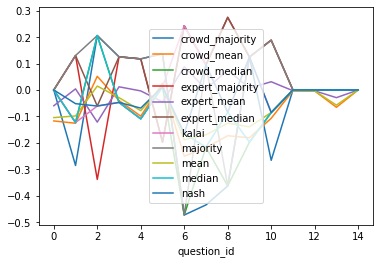

In [46]:
fig, ax = plt.subplots()
for label, grp in all_detail_results.groupby('method'):
    grp.plot(x = 'question_id', y = 'diff_gain_sat',ax = ax, label = label)

In [47]:
expert_type = 'traffic'
detail = pd.read_csv('results_tx/results_detail_all_' + expert_type + '.csv').drop('Unnamed: 0', axis = 1)

In [48]:
#optimal_grade-nash
ren_dict = {'vote-kalai' : 'optimal_grade-kalai',
'crowd_mean' : 'optimal_grade-crowd_mean',
'expert_mean' : 'optimal_grade-expert_mean' ,
'mean': 'optimal_grade-mean',
'crowd_median' : 'optimal_grade-crowd_median',
'expert_median' : 'optimal_grade-expert_median',
'median' : 'optimal_grade-median',
'crowd_majority' : 'optimal_grade-crowd_majority',
'expert_majority' : 'optimal_grade-expert_majority',
'majority' : 'optimal_grade-majority'}

detail = detail.rename(columns=ren_dict)

In [49]:
measure_cols = [col for col in detail.columns if 'sat' in col or 'area' in col or 'sum_gain' in col]
#measure_cols = [col for col in measure_cols if  'rel_' not in col]

crd_sat = [col for col in measure_cols if  'crowd_sat'  in col and 'rel' not in col]
exp_sat = [col for col in measure_cols if  'expert_sat'  in col and 'rel' not in col]
sum_sat = [col for col in measure_cols if  'satisfaction_sum'  in col and 'rel' not in col]
area_sat = [col for col in measure_cols if  'area'  in col and 'rel' not in col]
gain_sat = [col for col in measure_cols if  'sum_gain'  in col]
rel_sat = [col for col in measure_cols if 'rel_sat' in col]
rel_area = [col for col in rel_sat if 'area' in col]
rel_sum = [col for col in rel_sat if 'sum' in col]
grade = [col for col in detail.columns if 'optimal_grade' in col]
lbd = [col for col in detail.columns if 'lambda' in col] 

In [50]:
crd = pd.melt(detail, id_vars=['question_id'], value_vars=crd_sat, var_name = 'method', value_name = 'crowd_sat')
crd['method'] = crd['method'].str.split('-').apply(lambda x: x[1]) 

exp = pd.melt(detail, id_vars=['question_id'], value_vars=exp_sat, var_name = 'method', value_name = 'expert_sat')
exp['method'] = exp['method'].str.split('-').apply(lambda x: x[1]) 

tot = pd.melt(detail, id_vars=['question_id'], value_vars=sum_sat, var_name = 'method', value_name = 'sum_sat')
tot['method'] = tot['method'].str.split('-').apply(lambda x: x[1]) 

area = pd.melt(detail, id_vars=['question_id'], value_vars=area_sat, var_name = 'method', value_name = 'area_sat')
area['method'] = area['method'].str.split('-').apply(lambda x: x[1]) 

gain = pd.melt(detail, id_vars=['question_id'], value_vars=gain_sat, var_name = 'method', value_name = 'diff_gain_sat')
gain['method'] = gain['method'].str.split('-').apply(lambda x: x[1]) 

r_area = pd.melt(detail, id_vars=['question_id'], value_vars=rel_area, var_name = 'method', value_name = 'rel_area_sat')
r_area['method'] = r_area['method'].str.split('-').apply(lambda x: x[1])

r_sum = pd.melt(detail, id_vars=['question_id'], value_vars=rel_sum, var_name = 'method', value_name = 'rel_sum_sat')
r_sum['method'] = r_sum['method'].str.split('-').apply(lambda x: x[1])

vote = pd.melt(detail, id_vars=['question_id'], value_vars= grade, var_name = 'method', value_name = 'optimal_grade')
vote['method'] = vote['method'].str.split('-').apply(lambda x: x[1])

lamd = pd.melt(detail, id_vars=['question_id'], value_vars= lbd, var_name = 'method', value_name = 'lambda_exp')
lamd['method'] = lamd['method'].str.split('-').apply(lambda x: x[1])

In [51]:
all_detail_results1 = reduce(lambda left,right: pd.merge(left, right, how = 'outer' ,on=['question_id', 'method']), [crd,exp,tot,area,gain,r_area, r_sum, vote, lamd])
all_detail_results1 = pd.merge(all_detail_results1, detail[['question_id', 'median-diff']], on = 'question_id')
all_detail_results1['data_set'] = 'traffic'

In [52]:
all_detail_results = all_detail_results.append(all_detail_results1)

In [53]:
all_detail_results

,question_id,method,crowd_sat,expert_sat,sum_sat,area_sat,diff_gain_sat,rel_area_sat,rel_sum_sat,optimal_grade,lambda_exp,median-diff,data_set
0,0.0,nash,2.294920,2.640541,4.935461,6.059830,0.000000e+00,1.000000,2.000000,1.000000,0.5,0.0,driver
1,0.0,kalai,2.294920,2.640541,4.935461,6.059830,-7.302919e-10,1.000000,2.000000,1.000000,0.5,0.0,driver
2,0.0,crowd_mean,2.255898,2.286095,4.541993,5.157197,-1.172282e-01,0.851046,1.848764,1.705080,NaN,0.0,driver
3,0.0,expert_mean,2.275026,2.459839,4.734865,5.596199,-5.976460e-02,0.923491,1.922898,1.359459,NaN,0.0,driver
4,0.0,mean,2.260088,2.324156,4.584244,5.252798,-1.046400e-01,0.866823,1.865004,1.629366,NaN,0.0,driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,14.0,expert_median,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,traffic
161,14.0,median,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,traffic
162,14.0,crowd_majority,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,traffic
163,14.0,expert_majority,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,NaN,0.0,traffic


In [54]:
from Load_taxi_data import Load_TX_Data
#df_driver = Load_TX_Data('driver')['df_driver']
#df_traffic= Load_TX_Data('traffic')['df_traffic']
#df_crowd = Load_TX_Data('crowd')['df_crowd']
all_votes = Load_TX_Data('driver')['all_votes']

In [87]:
all_votes['group'] =all_votes['voter'].str.split('_').apply(lambda x: x[1] if x[1] == 'crowd' else x[0] )
#all_votes

In [141]:
alt = 8
df = all_votes[all_votes['question_id'] == alt]
title  = 'Solution for alternative number: ' + str(alt)

df_g = df.groupby(['group', 'rate']).size().reset_index()
df_g['percentage'] = df.groupby(['group', 'rate']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

df_g.columns = ['group', 'rate', 'Counts', 'Percentage']

[Text(0.5, 1.0, 'Votes distribution for alternative: 8')]

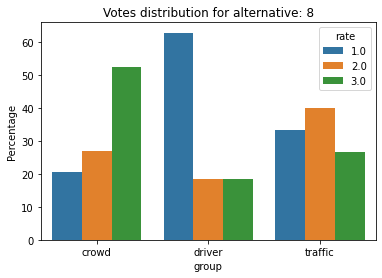

In [142]:
sns.barplot(x = 'group', y = 'Percentage',hue = 'rate', data = df_g).set(title= 'Votes distribution for alternative: ' + str(alt))

In [143]:
plot_data_and_solution(df, all_detail_results, title, alt)

In [104]:
df_g['prob'] = df_g['Percentage']/100
df_g['log_prob'] = np.log1p(df_g['prob'])
df_g['prob_log_prob'] = df_g['log_prob']*df_g['prob']
df_g_grouped = df_g.groupby('group').agg({'prob_log_prob':'sum'})
df_g_grouped['enthropy'] = -df_g_grouped['prob_log_prob']
df_g_grouped

,prob_log_prob,enthropy
group,,
crowd,0.324156,-0.324156
driver,0.370195,-0.370195
traffic,0.293520,-0.293520


In [118]:
c = df_g_grouped[df_g_grouped.index == 'crowd']['enthropy'].item()
d = df_g_grouped[df_g_grouped.index == 'driver']['enthropy'].item()
t = df_g_grouped[df_g_grouped.index == 'traffic']['enthropy'].item()

In [119]:
def new_lambda(c, e):
    return 1-e/(e+c)

In [121]:
new_lambda(c, t)

0.5247991944261486

In [122]:
crowd_rates = df[df.group=='crowd']['rate']
c_q75, c_q25 = np.percentile(crowd_rates, [75 ,25])
c_iqr = c_q75 - c_q25
c_iqr

1.0

In [123]:
traffic_rates = df[df.group=='traffic']['rate']
t_q75, t_q25 = np.percentile(traffic_rates, [75 ,25])
t_iqr = t_q75 - t_q25
t_iqr

1.5

In [124]:
driver_rates = df[df.group=='driver']['rate']
d_q75, d_q25 = np.percentile(driver_rates, [75 ,25])
d_iqr = d_q75 - d_q25
d_iqr

1.0

In [126]:
new_lambda(c_iqr, t_iqr)

0.4

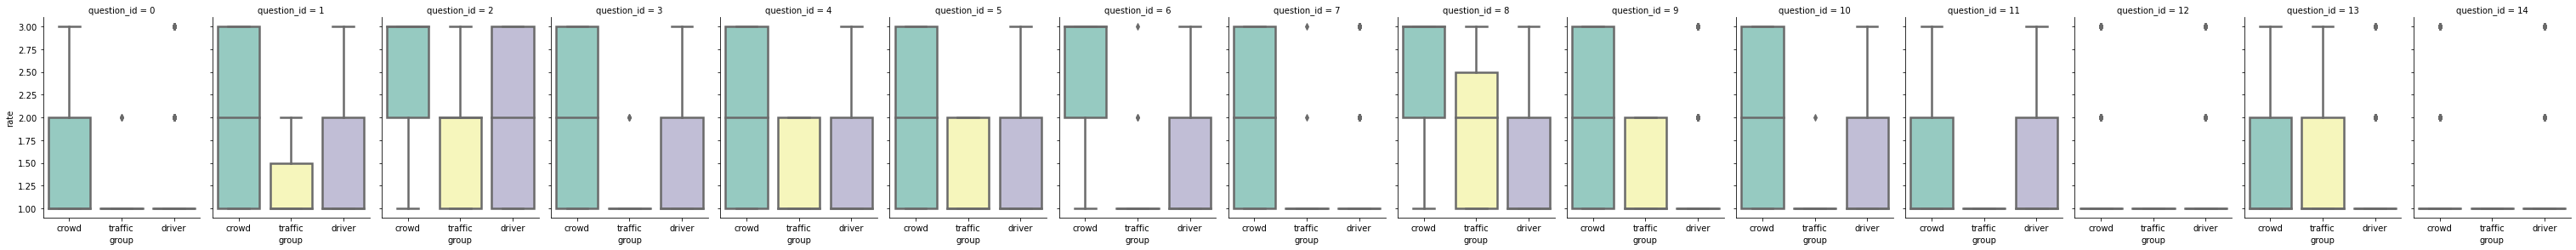

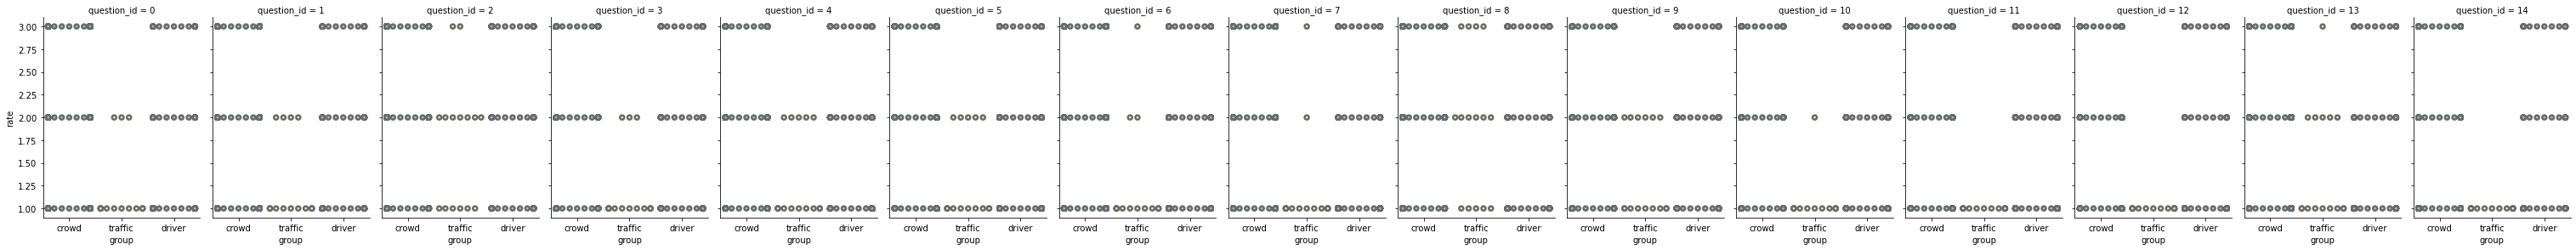

In [33]:
sns.catplot(x="group", y="rate", col = 'question_id', data=all_votes, palette="Set3", kind = 'box', linewidth=2.5, height = 4., aspect = .7)
sns.catplot(x="group", y="rate", col = 'question_id', data=all_votes, palette="Set3", kind = 'swarm', linewidth=2.5, height = 4., aspect = .7)

plt.show()

In [34]:
all_detail_results[(all_detail_results['question_id'] == 8)]


,question_id,method,crowd_sat,expert_sat,sum_sat,area_sat,diff_gain_sat,rel_area_sat,rel_sum_sat,optimal_grade,lambda_exp,median-diff,data_set
88,8.0,nash,2.269172,2.185379,4.454551,4.959000,-0.084368,0.875093,1.872830,1.999998,0.500000,2.0,driver
89,8.0,kalai,2.269173,2.185379,4.454552,4.959002,-0.084368,NaN,NaN,2.000000,0.569162,2.0,driver
90,8.0,crowd_mean,2.284993,1.984778,4.269771,4.535203,-0.173274,0.800308,1.797569,2.318797,NaN,2.0,driver
91,8.0,expert_mean,2.008194,2.300111,4.308305,4.619070,0.075128,0.815107,1.807228,1.556136,NaN,2.0,driver
92,8.0,mean,2.276531,2.092076,4.368607,4.762676,-0.125720,0.840449,1.837825,2.148278,NaN,2.0,driver
93,8.0,crowd_median,2.318797,1.556136,3.874933,3.608363,-0.363248,0.636752,1.636752,3.000000,NaN,2.0,driver
94,8.0,expert_median,1.681203,2.443864,4.125067,4.108632,0.274968,0.725032,1.725032,1.000000,NaN,2.0,driver
95,8.0,median,2.269173,2.185379,4.454552,4.959002,-0.084368,0.875094,1.872830,2.000000,NaN,2.0,driver
96,8.0,crowd_majority,2.318797,1.556136,3.874933,3.608363,-0.363248,0.636752,1.636752,3.000000,NaN,2.0,driver
97,8.0,expert_majority,1.681203,2.443864,4.125067,4.108632,0.274968,0.725032,1.725032,1.000000,NaN,2.0,driver


In [131]:
def plot_data_and_solution(df, all_detail_results, title, alt):
    fig = px.box(df, x="group", y="rate", points="all", title=title)
    
    grade_crm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'crowd_mean') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x = 0.0, y = grade_crm,
                text="Cr mean",
                showarrow=True,
                arrowhead=1
                )

    grade_drm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'expert_mean') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x = 2.2, y = grade_drm,
                text="Dr mean",
                showarrow=True,
                arrowhead=1
                )

    grade_exm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'expert_mean') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
    fig.add_annotation(x = 1.0, y = grade_exm,
                text="Exp mean",
                showarrow=True,
                arrowhead=1
                )

    grade_k_tr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'kalai') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
    fig.add_annotation(x = 0.3, y = grade_k_tr,
                text="Kalai(T)",
                showarrow=True,
                arrowhead=1
                )

    grade_n_tr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'nash') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
    fig.add_annotation(x=0.5, y=grade_n_tr,
                text="Nash(T)",
                showarrow=True,
                arrowhead=1)

    grade_k_dr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'kalai') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x = 1.4, y = grade_k_dr,
                text="Kalai(D)",
                showarrow=True,
                arrowhead=1
                )
    grade_n_dr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'nash') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x=1.6, y=grade_n_dr,
                text="Nash(D)",
                showarrow=True,
                arrowhead=1)

    #fig.write_image("results_tx/fig1.png")

    fig.show()
   


In [ ]:
for i in list(np.sort(all_votes['question_id'].unique())):
    #print(i)
    alt = i
    df = all_votes[all_votes['question_id'] == alt]
    title  = 'Solution for alternative number: ' + str(alt)
    print(title)